#Open CV Tutorial

In [73]:
import PIL

In [74]:
import cv2
import tensorflow as tf
import os
from PIL import Image
print(tf.__version__)

2.16.0-dev20231022


In [75]:
gpus  = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [76]:
image_exts  = ['jpeg', 'jpg', 'bmp', 'png']

#Remove unavaiable file type

In [77]:
for image_class in os.listdir('data'):
    for image in os.listdir(os.path.join('data', image_class)):
        image_path = os.path.join('data', image_class, image)
        try:
            with Image.open(image_path) as img:
                if img.format.lower() not in image_exts:
                    print(image_path, " is not in format")
        except Exception as e:
            print(e)

In [78]:
img = cv2.imread(os.path.join('data','cats_data', '_4e6b287.jpg'))

In [79]:
print(img.shape)

(2560, 1920, 3)


In [80]:
from matplotlib import pyplot as plt

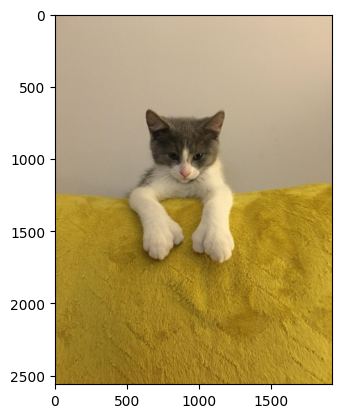

In [81]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#Load the data

In [82]:
data = tf.keras.preprocessing.image_dataset_from_directory('data', batch_size=8)

Found 46 files belonging to 2 classes.


In [83]:
iterator = data.as_numpy_iterator()

In [84]:
batch = iterator.next()

In [85]:
batch

(array([[[[ 62.      ,  62.      ,  50.      ],
          [ 62.      ,  63.75    ,  50.4375  ],
          [ 61.9375  ,  66.5     ,  51.3125  ],
          ...,
          [138.875   , 191.8125  , 157.875   ],
          [127.625   , 186.125   , 150.4375  ],
          [118.      , 180.      , 143.      ]],
 
         [[ 54.5625  ,  55.4375  ,  39.5     ],
          [ 55.13672 ,  57.570312,  41.085938],
          [ 56.003906,  60.976562,  43.73828 ],
          ...,
          [130.83594 , 183.77344 , 149.83594 ],
          [119.12109 , 177.6211  , 141.9336  ],
          [109.6875  , 171.6875  , 134.6875  ]],
 
         [[ 45.5     ,  47.5     ,  25.375   ],
          [ 46.89453 ,  50.20703 ,  28.683594],
          [ 49.04297 ,  54.535156,  33.964844],
          ...,
          [120.28906 , 173.23828 , 139.29688 ],
          [107.81641 , 166.3164  , 130.6289  ],
          [ 98.4375  , 160.4375  , 123.4375  ]],
 
         ...,
 
         [[ 59.5     ,  68.375   ,  85.3125  ],
          [ 57.640

In [86]:
batch[0].shape

(8, 256, 256, 3)

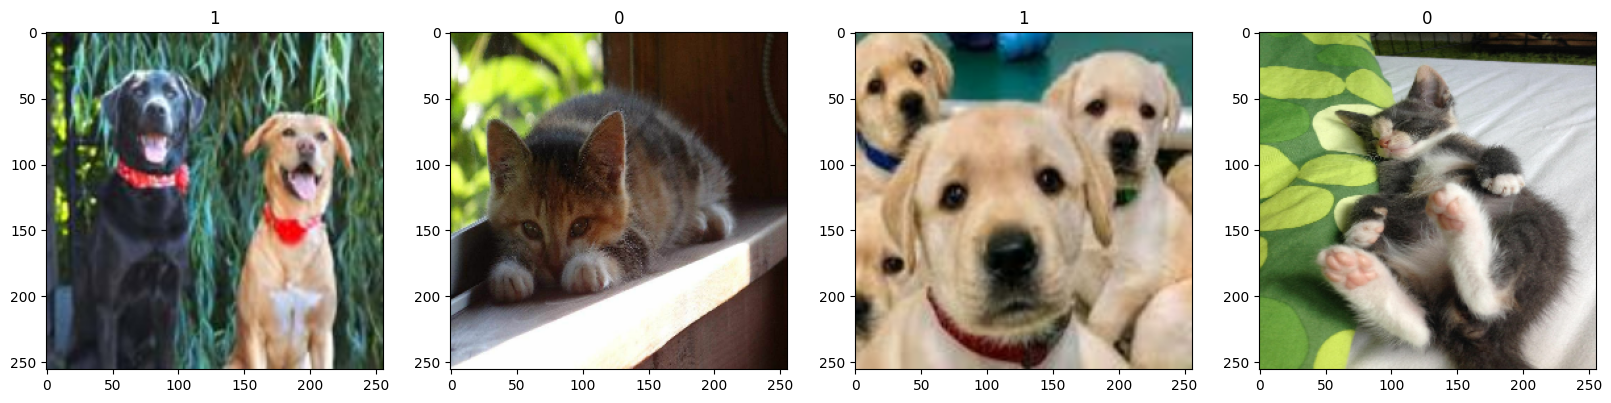

In [87]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    
    ax[index].set_title(batch[1][index])
#1 = dog , 0 = cat

Preprocess data

In [88]:
data = data.map(lambda x, y: (x/255, y))

In [89]:
scaled_iterator = data.as_numpy_iterator()

In [90]:
batch = scaled_iterator.next()
print(batch)

(array([[[[0.45882353, 0.32156864, 0.10980392],
         [0.46740195, 0.33014706, 0.11838235],
         [0.48014706, 0.34289217, 0.13112745],
         ...,
         [0.2867647 , 0.2       , 0.04730392],
         [0.2840686 , 0.19779412, 0.04485294],
         [0.28235295, 0.19607843, 0.04313726]],

        [[0.4759804 , 0.33872548, 0.12696078],
         [0.4830576 , 0.3458027 , 0.13403799],
         [0.49376532, 0.35651043, 0.14474571],
         ...,
         [0.2867647 , 0.2       , 0.04730392],
         [0.2840686 , 0.19779412, 0.04485294],
         [0.28235295, 0.19607843, 0.04313726]],

        [[0.4982843 , 0.36102942, 0.14926471],
         [0.50332415, 0.36606923, 0.15430453],
         [0.51122856, 0.37397364, 0.16217831],
         ...,
         [0.2867494 , 0.19954044, 0.04702819],
         [0.2840686 , 0.19730392, 0.04460784],
         [0.28235295, 0.19558823, 0.04289216]],

        ...,

        [[0.4004902 , 0.3259804 , 0.19681373],
         [0.40038297, 0.32587317, 0.19670649

In [91]:
batch[0].max() ,batch[0].min()

(1.0, 0.0)

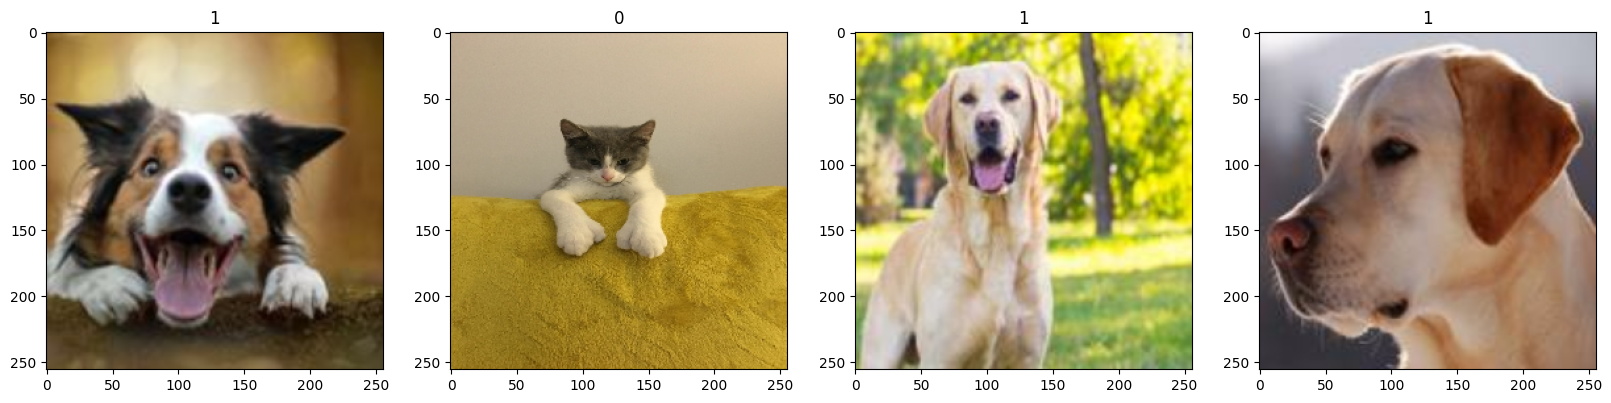

In [92]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img)
    
    ax[index].set_title(batch[1][index])

In [103]:
train_size = int(len(data) * .7)
val_size = int(len(data)*.2) 
test_size = int(len(data)*.1) +1 

In [104]:
print(train_size)
print(val_size)
print(test_size)

4
1
1


In [105]:
batch[0].shape

(8, 256, 256, 3)

## CNN 

In [106]:
train= data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [107]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten

In [109]:
model = Sequential()

In [110]:
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\miniconda3\envs\notebook\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [113]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)      │        448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)      │      4,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)        │      4,624 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 256)               │  3,686,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 1)                 │        257 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [115]:
import tensorflow as tf
logs = 'logs'
tensorboard_callbck = tf.keras.callbacks.TensorBoard(log_dir=logs)

In [116]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callbck])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.4625 - loss: 1.0921 - val_accuracy: 0.6250 - val_loss: 0.7497
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - accuracy: 0.5542 - loss: 0.8226 - val_accuracy: 0.6250 - val_loss: 0.6658
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.7167 - loss: 0.6688 - val_accuracy: 0.7500 - val_loss: 0.6627
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.7833 - loss: 0.6440 - val_accuracy: 0.7500 - val_loss: 0.6052
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.7250 - loss: 0.5908 - val_accuracy: 1.0000 - val_loss: 0.2492
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.7000 - loss: 0.5698 - val_accuracy: 1.0000 - val_loss: 0.3528
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.8542 - loss: 0.4255 - val_accuracy: 1.0000 - val_loss: 0.2213
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.9167 - loss: 0.3283 - val_accuracy: 1.0000 - val_loss:

In [117]:
hist.history

{'accuracy': [0.5,
  0.59375,
  0.78125,
  0.78125,
  0.8125,
  0.6875,
  0.8125,
  0.90625,
  0.875,
  0.9375,
  0.90625,
  0.9375,
  0.96875,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.0963728427886963,
  0.7455254197120667,
  0.670341968536377,
  0.642937421798706,
  0.554347038269043,
  0.5659028887748718,
  0.4502703547477722,
  0.30378079414367676,
  0.3181614279747009,
  0.21997156739234924,
  0.1933586299419403,
  0.14260706305503845,
  0.0576060451567173,
  0.08376015722751617,
  0.035733647644519806,
  0.023345306515693665,
  0.0089656887575984,
  0.0047905463725328445,
  0.001682407222688198,
  0.002414529910311103],
 'val_accuracy': [0.625,
  0.625,
  0.75,
  0.75,
  1.0,
  1.0,
  1.0,
  1.0,
  0.875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.749733567237854,
  0.6658248901367188,
  0.6627119779586792,
  0.6052106022834778,
  0.2491549253463745,
  0.3528255224227905,
  0.22128243744373322,
  0.080557

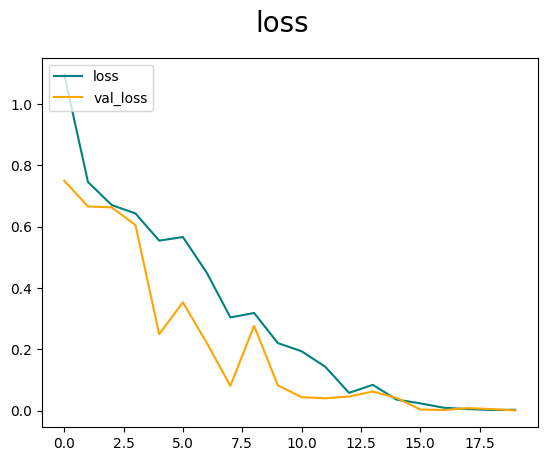

In [120]:
fig =plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

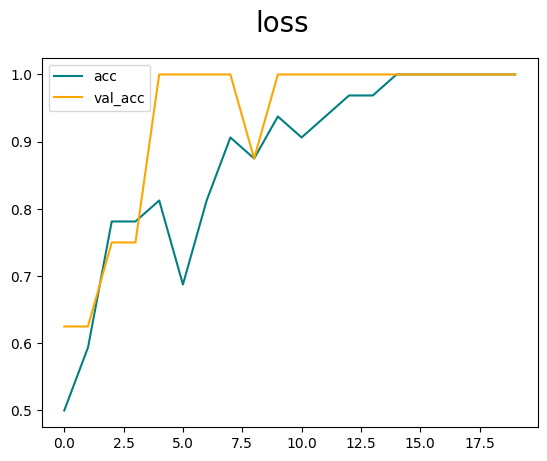

In [121]:
fig =plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='acc')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_acc')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate

In [122]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [123]:
pre = Precision()
re = Recall()
accuracy = BinaryAccuracy()

In [127]:
for batch in test.as_numpy_iterator():
    x,y =batch
    pred = model.predict(x)
    pre.update_state(y, pred)
    re.update_state(y,pred)
    accuracy.update_state(y,pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [130]:
print(f'Precision: {pre.result().numpy()} , Recall : {re.result().numpy()}, Accuracy {accuracy.result().numpy()}')

Precision: 1.0 , Recall : 1.0, Accuracy 1.0


In [163]:
import cv2
dog = os.path.join('test', 'dog.jpeg')

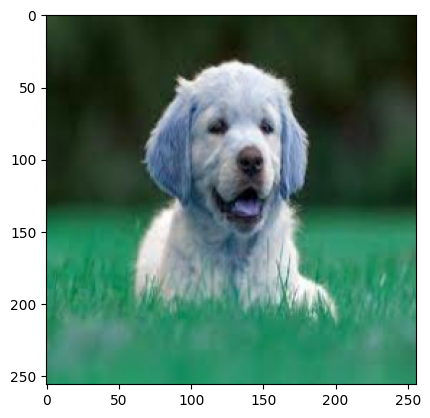

In [164]:

dog = cv2.imread('test/dog.jpeg')
dog = tf.image.resize(dog, (256,256))
plt.imshow(dog.numpy().astype(int))

In [165]:
import numpy as np
pred = model.predict(np.expand_dims(dog/255, 0 ))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [166]:
if pred > .5:
    print("dog")
else:
    print("cat")

dog


In [167]:
print(pred)

[[0.8422524]]


As you can see the model predicts cats and dogs. Certainly this model is not trained with enough data, biased towards the data that it limitedly trained on, and probably has high variance towards the small dataset.

In [169]:
from keras.models import load_model


In [171]:
model.save(os.path.join('models','dog_cat.h5'))

In [174]:
new_model = load_model('./models/dog_cat.h5')

In [176]:
new_model.predict(np.expand_dims(dog/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


array([[0.8422524]], dtype=float32)